# 两种计算统计功效的方法

### 
### 第一种：RMSEA法：该方法旨在说明你的样本量下模型拟合质量是否过关。

这里涉及两种假设：
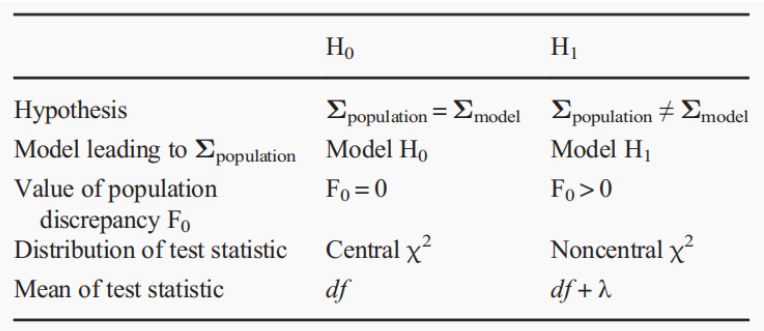

H0 假设代表模型与样本相符

H1 假设代表模型与样本不符，不符的部分我们称之为“misspecification error”

#### RMSEA 这个指标衡量模型每个 df 承受的misspecification error有少数，越多，则RMSEA越大。模型拟合越差。

RMSEA好坏标准如下

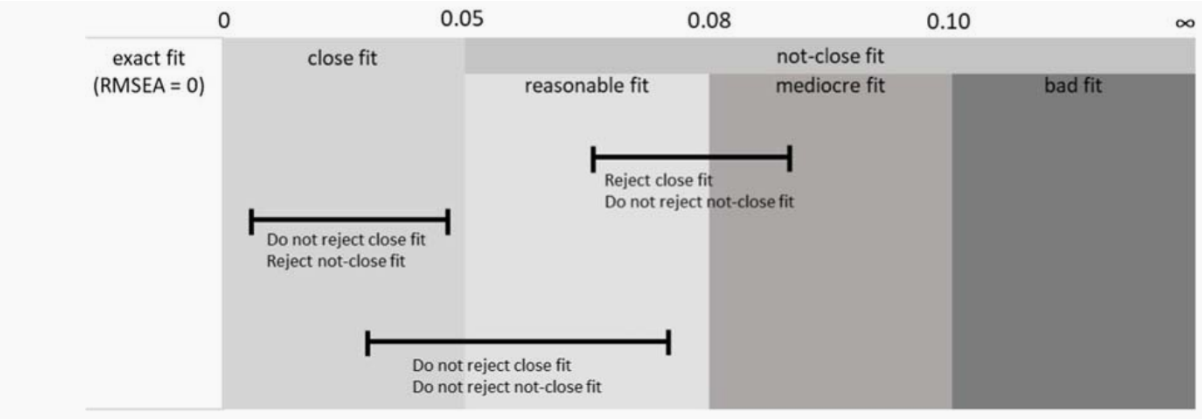

一般认为 RMSEA > 0.10 就不能接受了，那么你的样本量是否足够说明你的RMSEA是小于0.1的呢？

假设我们模型 RMSEA = 0.05，你的模型 df = 50，我们已有样本量是100。

下图是现有样本量下，RMSEA=0.05 的模型 和H1模型

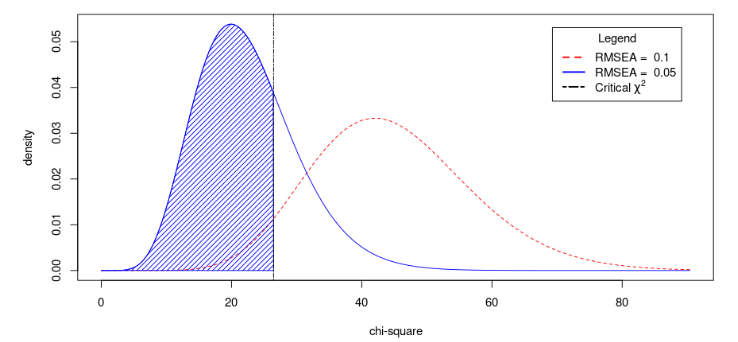

In [6]:
#使用semTools包中的findRMSEApower计算
library(semTools)

In [8]:
findRMSEApower(rmsea0=0.10, rmseaA=0.05, df=50, n = 100, alpha = 0.025)

[1] 0.702364

#### 一般要求rmseaA小于rmsea0的统计功效>0.80才可以，此结果样本量样本不够。

#### 那么多少样本才够呢？

In [11]:
findRMSEAsamplesize(rmsea0=0.10, rmseaA=0.05, df=50, power = 0.8, alpha = 0.025)

[1] 117

### 参考文献

MacCallum, R. C., Browne, M. W., & Sugawara, H. M. (1996). Power analysis and determination of sample size for covariance structure modeling. Psychological Methods, 1(2), 130--149. 10.1037/1082-989X.1.2.130

Jak, S., Jorgensen, T. D., Verdam, M. G., Oort, F. J., & Elffers, L. (2021). Analytical power calculations for structural equation modeling: A tutorial and Shiny app. Behavior Research Methods, 53, 1385--1406. 10.3758/s13428-020-01479-0

# 
### 第二种方法：蒙地卡罗法：样本量是否足够支撑路径效应？

#### 蒙地卡罗法也叫做计算机模拟法：其核心思想是我不断生成随机样本，套入模型结构，看是否符合期望。重复n次，有m此成功，则期望存在的概率可以看成n/m

对于结构方程模型而言：我随机生成200个样本跑期望模型，重复100次，有90次期望的路径效应显著，则该路径效应的power 为90%。

以“潜变量结构方程模型之链式中介与并行中介”为例

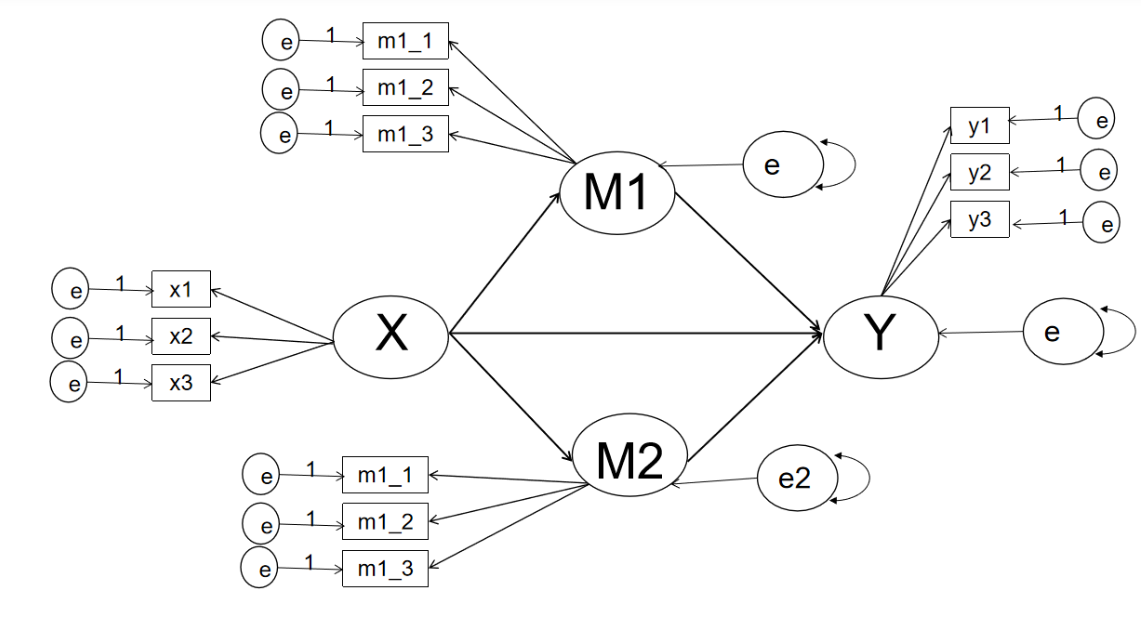

In [1]:
# 读取数据
BASE <- read.csv("C:/Users/77387/Desktop/Data_analysis_courses/R语言与结构方程模型/data/data_multi_med_latent.csv")
head(BASE)

,x1,x2,x3,y1,y2,y3,m1_1,m1_2,m1_3,m2_1,m2_2,m2_3
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,4,4,4,-1,3,-1,-1,0,-3,4,3,1
2,5,5,4,3,1,1,4,-1,-1,0,3,3
3,4,3,4,1,2,1,3,2,-1,1,2,0
4,3,4,3,0,2,1,0,1,2,4,1,-1
5,3,2,5,2,2,1,1,2,3,2,0,8
6,4,4,4,3,1,1,0,2,2,-4,-3,3


In [3]:
# 载入数据库
library(lavaan)
# 在lavaan中定义模型
MOD <- "
   # 定义测量模型
    X =~ x1 + x2 + x3
   M1 =~ m1_1 + m1_2 + m1_3
   M2 =~ m2_1 + m2_2 + m2_3
    Y =~ y1 + y2 + y3
   
   # 定义结构模型
    Y ~ b1 * M1 + b2 * M2 + c * X
   M1 ~ a1 * X
   M2 ~ a2 * X

   #定义M1的中介效应
   indirect1 := a1 * b1

   #定义M2的中介效应
   indirect2 := a2 * b2

   #定义总效应
   total := c + (a1 * b1) + (a2 * b2)
   M1 ~~ M2

"

Warning message:
"程辑包'lavaan'是用R版本4.2.3 来建造的"
This is lavaan 0.6-16
lavaan is FREE software! Please report any bugs.



In [35]:
# 拟合模型
MOD_fit <- sem(MOD,BASE)
summary(MOD_fit)

Warning message in lavaan::lavaan(model = MOD, data = BASE, model.type = "sem", :
"lavaan WARNING:
    the optimizer warns that a solution has NOT been found!"


lhs,op,rhs,label,exo,est,se,z,pvalue
<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X,=~,x1,,0,1.0000000,0,NA,NA
X,=~,x2,,0,0.7669153,NA,NA,NA
X,=~,x3,,0,0.4966851,NA,NA,NA
M1,=~,m1_1,,0,1.0000000,0,NA,NA
M1,=~,m1_2,,0,-0.2882956,NA,NA,NA
M1,=~,m1_3,,0,0.4464398,NA,NA,NA
M2,=~,m2_1,,0,1.0000000,0,NA,NA
M2,=~,m2_2,,0,0.8235610,NA,NA,NA
M2,=~,m2_3,,0,0.3217819,NA,NA,NA


In [24]:
library(simsem)

In [40]:
popModel <- "
   # 定义测量模型
    X =~ 1 * x1   + 0.77 * x2   + 0.50 * x3
   M1 =~ 1 * m1_1 + (- 0.29) * m1_2 + 0.45 * m1_3
   M2 =~ 1 * m2_1 + 0.82 * m2_2 + 0.32 * m2_3
    Y =~ 1 * y1   + (- 0.14) * y2   + 0.29 * y3
   
   # 定义结构模型
    Y ~ 0.9* M1 +(- 0.2 )* M2 + 0.19 * X
   M1 ~ 0.40 * X
   M2 ~ 1.06 * X


   M1 ~~ 0.37 * M2

"

analysisMOD <- "
 # 定义测量模型
    X =~ x1 + x2 + x3
   M1 =~ m1_1 + m1_2 + m1_3
   M2 =~ m2_1 + m2_2 + m2_3
    Y =~ y1 + y2 + y3
   
   # 定义结构模型
    Y ~ b1 * M1 + b2 * M2 + c * X
   M1 ~ a1 * X
   M2 ~ a2 * X

   M1 ~~ M2
"

In [42]:
Output <- sim(5, model=analysisMOD, n=200, generate=popModel, std.lv=TRUE, lavaanfun = "cfa")
summary(Output)

Progress: 1 / 5 


Warning message in lav_model_vcov(lavmodel = lavmodel, lavsamplestats = lavsamplestats, :
"lavaan WARNING:
    Could not compute standard errors! The information matrix could
    not be inverted. This may be a symptom that the model is not
    identified."
Warning message in lav_model_vcov(lavmodel = lavmodel, lavsamplestats = object@SampleStats, :
"lavaan WARNING:
    Could not compute standard errors! The information matrix could
    not be inverted. This may be a symptom that the model is not
    identified."


Progress: 2 / 5 
Progress: 3 / 5 


Warning message in lav_object_post_check(object):
"lavaan WARNING: some estimated ov variances are negative"


Progress: 4 / 5 
Progress: 5 / 5 


Warning message in lav_object_post_check(object):
"lavaan WARNING: some estimated ov variances are negative"


RESULT OBJECT
Model Type
[1] "lavaan"
========= Fit Indices Cutoffs ============
           Alpha
Fit Indices      0.1     0.05     0.01    0.001     Mean     SD
      chisq   62.012   62.193   62.337   62.370   52.208  9.056
      aic   7633.363 7641.648 7648.276 7649.768 7588.515 41.284
      bic   7732.313 7740.598 7747.226 7748.717 7687.464 41.284
      rmsea    0.038    0.038    0.039    0.039    0.017  0.020
      cfi      0.961    0.960    0.959    0.959    0.984  0.021
      tli      0.946    0.945    0.944    0.944    0.984  0.035
      srmr     0.053    0.053    0.053    0.053    0.047  0.006
========= Parameter Estimates and Standard Errors ============
           Estimate Average Estimate SD Average SE Power (Not equal 0) Std Est
X=~x1                 1.011       0.140      0.111                1.00   0.726
X=~x2                 0.763       0.163      0.095                1.00   0.614
X=~x3                 0.472       0.067      0.090                1.00   0.424
M1=~m1_1   